# Final Project , Part 2 - By Nishi Mehta

Dataset for my final project is based on the upcoming 2020 U.S. elections and an attempt to show how Americans view the coronavirus (COVID-19) crisis. It is an amalgamation of multiple datasets to visualize a dashboard in   .

1) The "name" of the datasets are 'How Popular is Donald Trump', 'Latest Polls', "How Americans View The Coronavirus Crisis And Trump's Response".

2) Source obtained for the above datasets is from an online news channel column called 'FiveThirtyeight' from 'abcNEWS'.

3) URL:  https://data.fivethirtyeight.com/

4) The extension of the data downloaded from the above website is .csv (.zip) in nature. No need for registration or file format conversion to access the same. These files can then be used for imports and visualization!!

5) The file size is around 303 KB, 1.4 MB  and 2.9 MB each.


## Reading csv file

In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import datetime
import bqplot as bq

In [23]:
from __future__ import print_function
from IPython.display import display
import ipywidgets as ipy
from ipywidgets import Layout, Dropdown, Button
from ipywidgets import Image as ImageIpy

In [3]:
popular_file=pd.read_csv('trump-approval-ratings/approval_topline.csv')
poll_file=pd.read_csv('polls/president_polls.csv')
covid_file=pd.read_csv('covid-19-polls-master/covid_concern_polls.csv')

In [4]:
poll_file.tail()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,ranked_choice_reallocated,created_at,notes,url,stage,race_id,answer,candidate_name,candidate_party,pct
4140,92081,57026,2020,Ohio,383,Public Policy Polling,918,DEM,Public Policy Polling,263.0,...,False,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246.0,Trump,Donald Trump,REP,46.0
4141,92082,57026,2020,Ohio,383,Public Policy Polling,918,DEM,Public Policy Polling,263.0,...,False,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246.0,Warren,Elizabeth Warren,DEM,43.0
4142,92082,57026,2020,Ohio,383,Public Policy Polling,918,DEM,Public Policy Polling,263.0,...,False,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246.0,Trump,Donald Trump,REP,49.0
4143,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,False,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210.0,Obama,Michelle Obama,DEM,50.0
4144,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,False,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210.0,Trump,Donald Trump,REP,43.0


In [5]:
#covid_file

Extracting a subset (only for display at the moment) of the csv file # too many records to handle and visualise

In [6]:
poll_file=poll_file.head(1000)

In [7]:
# converting into datetime
covid_file['end_date']=pd.to_datetime(covid_file['end_date'],format='%Y-%m-%d')
covid_file['start_date']=pd.to_datetime(covid_file['start_date'],format='%Y-%m-%d')

In [8]:
poll_file['end_date']=pd.to_datetime(poll_file['end_date'],format='%m/%d/%y')
poll_file['start_date']=pd.to_datetime(poll_file['start_date'],format='%m/%d/%y')

In [9]:
type(covid_file['start_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

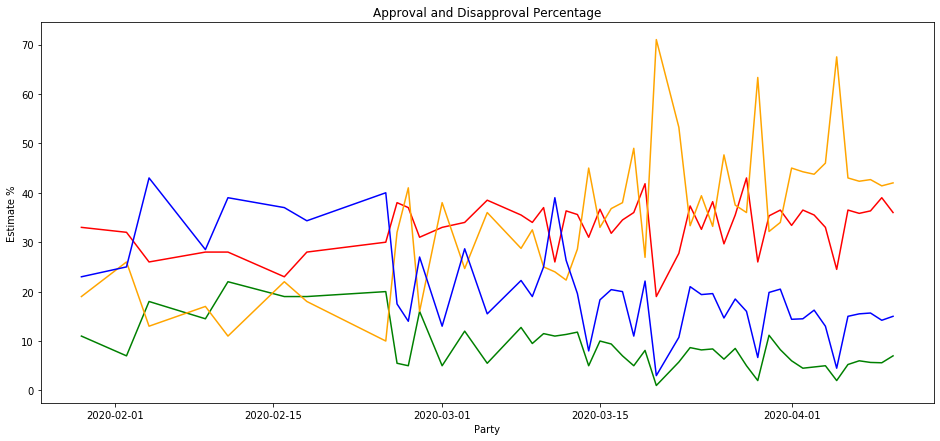

In [10]:
# creating a line plot in matplotlib
ax = plt.figure(figsize=(16,7))
plt.plot(covid_file.groupby('end_date').mean()['somewhat'],color='red')
plt.plot(covid_file.groupby('end_date').mean()['not_at_all'], color='g')
plt.plot(covid_file.groupby('end_date').mean()['very'], color='orange')
plt.plot(covid_file.groupby('end_date').mean()['not_very'], color='blue')

plt.ylabel('Estimate %')
plt.xlabel('Party')
plt.title('Approval and Disapproval Percentage')

plt.show()

## Line chart for America's response

In [11]:
x=covid_file['end_date'].sort_values().unique()
x = np.array(x, dtype='datetime64[D]')
y=[covid_file.groupby('end_date').mean()['somewhat'], covid_file.groupby('end_date').mean()['not_at_all'], covid_file.groupby('end_date').mean()['very'],covid_file.groupby('end_date').mean()['not_very']  ] 

In [12]:
#y

In [13]:
#x

In [14]:
import datetime as dt # for formatting min/max in our bqplot.DateScale
x_scl = bq.DateScale(min=dt.datetime(2020, 1, 26), max=dt.datetime(2020, 4,15))

In [16]:
#x_sc = bqplot.LinearScale()
y_sc = bq.LinearScale()
x_ax = bq.Axis(scale = x_scl, label='Date')
y_ax = bq.Axis(scale = y_sc, label='% of American Response', orientation='vertical')
col_sc = bq.ColorScale(colors=['Red', 'Green','Orange','Blue'])

In [48]:
#Interaction
#panzoom = bq.interacts.PanZoom( scales={'x':[x_scl], 'y':[y_sc]})

In [19]:
def_tt=bq.Tooltip(fields=['name', 'index', 'color'])

In [20]:
lines = bq.Lines(x=x, y=y,scales={'x': x_scl, 'y': y_sc,'color':col_sc},tooltip=def_tt,display_legend=True,interactions={'click':'select','hover': 'tooltip'},labels=['somewhat','not_at_all','very','not_very'])

In [24]:
fig = bq.Figure(marks=[lines], axes=[x_ax, y_ax],title='How worried Are Americans About the Economy ?')
fig.layout.height = '700px'
fig.layout.width = '1000px'
#display(fig) # if figures are not showing, give this a shot
display(ipy.VBox([fig]))

## Dropdown

In [25]:
drop_down = ipy.Dropdown(
            options=['ABC News/Washington Post', 'YouGov ', 'Bendixen & Amandi International ', 'SurveyUSA', 'University of New Hampshire',
                    'University of California, Berkeley ','Selzer & Co.','Tulchin Research','Data for Progress'],
            value='ABC News/Washington Post',
            disabled=False
        )

## Bar chart for Poll votes

In [47]:
drop_down = ipy.Dropdown(
            options=['ABC News/Washington Post', 'YouGov','SurveyUSA', 'University of New Hampshire',
                    'University of California, Berkeley','Selzer & Co.'],
            value='ABC News/Washington Post',
            disabled=False)


x_sc = bq.OrdinalScale()
y_sc = bq.LinearScale()

x_ax = bq.Axis(scale = x_sc,orientation='vertical', grid_lines = 'dashed')
y_ax = bq.Axis(scale = y_sc, label='Vote%', orientation='horizontal')

poll_y_axis=poll_file[poll_file['pollster']== drop_down.value].groupby('answer').mean()['pct'].nlargest(15)
poll_x_axis=poll_y_axis.index.values.tolist()



poll_bar_chart = bq.Bars(x=poll_x_axis,y=poll_y_axis.tolist(), scales={'x':x_sc,'y':y_sc},  
                         orientation='horizontal',colors=['green'],
           interactions = {'click': 'tooltip'}, selected_style={'fill': 'red'})

# Changing interaction to select on click and tooltip on hover
poll_bar_chart.interactions = {'click': 'select', 'hover': 'tooltip'}



poll_fig = bq.Figure(marks=[poll_bar_chart],axes=[y_ax, x_ax], title='Who wins the most votes? poll by %s'% (drop_down.value))
poll_fig.layout.height = '700px'
poll_fig.layout.width = '1000px'

def on_drop_change(event):
    poll_y_axis=poll_file[poll_file['pollster']== str(event["new"])].groupby('answer').mean()['pct'].nlargest(15)
    poll_bar_chart.y = poll_y_axis.tolist()   
    poll_fig.title = 'Who wins the most votes? poll by ' + event['new'] 
    
drop_down.observe(on_drop_change, ['value'])
    


#display(fig) # if figures are not showing, give this a shot
display(ipy.VBox([drop_down,poll_fig]))

In [27]:
poll_file[poll_file['pollster']== drop_down.value].groupby('answer').mean()['pct'].nlargest(15)

answer
Sanders      52.000000
Bloomberg    51.000000
Biden        50.750000
Buttigieg    49.500000
Warren       49.000000
Klobuchar    48.000000
Trump        44.785714
Name: pct, dtype: float64

In [28]:
no_estimate=100.0-(popular_file['approve_estimate']+popular_file['disapprove_estimate'])

In [29]:
popular_file['no_estimate']=no_estimate

In [30]:
popular_file['modeldate'] = pd.to_datetime(popular_file['modeldate'])

In [31]:
popular_file.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp,no_estimate
0,Donald Trump,Voters,2020-04-11,45.002785,48.904752,41.100818,51.426613,55.499579,47.353647,19:43:51 11 Apr 2020,3.570602
1,Donald Trump,Adults,2020-04-11,43.753236,47.756355,39.750117,50.112176,55.208027,45.016326,19:42:24 11 Apr 2020,6.134588
2,Donald Trump,All polls,2020-04-11,44.417322,48.395946,40.438698,50.706717,55.396928,46.016506,19:41:27 11 Apr 2020,4.875961
3,Donald Trump,Adults,2020-04-10,43.746099,47.756709,39.735489,50.114895,55.206911,45.022879,18:24:26 10 Apr 2020,6.139006
4,Donald Trump,Voters,2020-04-10,44.938443,48.852511,41.024376,51.521640,55.607890,47.435391,18:25:53 10 Apr 2020,3.539917


In [32]:
type(popular_file['modeldate'][0])

pandas._libs.tslibs.timestamps.Timestamp

## Date Picker

In [34]:
dt_val = ipy.DatePicker(
    description='Pick a Date',
    disabled=False,
    value = datetime.date(2020, 4, 9)
)
dt_val

DatePicker(value=datetime.date(2020, 4, 9), description='Pick a Date')

## Dropdown

In [35]:
voter_drop_down = ipy.Dropdown(
            options=['All polls','Voters', 'Adults'],
            value='All polls',
            disabled=False
        )

## Bar chart of All Polls

In [40]:
dt_val = ipy.DatePicker(
    description='Pick a Date',
    disabled=False,
    value = datetime.date(2020, 4, 9)
)

voter_drop_down = ipy.Dropdown(
            options=['All polls','Voters', 'Adults'],
            value='All polls',
            disabled=False
        )


x_sc = bq.OrdinalScale()
y_sc = bq.LinearScale()
col_sc = bq.OrdinalColorScale(domain=[0, 1], colors=['Purple', 'Gray', 'Blue'])


x_data = ['Approve','Cant Say','Disapprove']
y_data = popular_file.loc[(popular_file['modeldate'].dt.date == dt_val.value) & (popular_file['subgroup']==voter_drop_down.value)][['approve_estimate','no_estimate','disapprove_estimate']].values.tolist()

bar_chart = bq.Bars(x=x_data, y=y_data, scales= {'x': x_sc, 'y': y_sc, 'color': col_sc},
                  type='grouped',
                  interactions={'click': 'select'},
                  colors=['Purple', 'Gray', 'teal'],
                 display_legend=True,
                 labels=['Approve','Cant Say','Disapprove'],
                )
                 

ax_x = bq.Axis(scale=x_sc, orientation='horizontal',label='Voting Class', grid_lines = 'none')
ax_y = bq.Axis(scale=y_sc, orientation='vertical',label = 'Percentage of votes', grid_lines = 'none')

bar_chart.interactions = {'click': 'select'}


voters_fig = bq.Figure(marks=[bar_chart], axes=[ax_x, ax_y], legend_location='right',
               title = 'How many Americans (%s) approve Trump on Date: %s ?'  % (str(voter_drop_down.value),str(dt_val.value)) )
voters_fig.layout.width = '800px'


def on_select_change(event):
    y_data=popular_file.loc[(popular_file['modeldate'].dt.date == event["new"]) & (popular_file['subgroup']==voter_drop_down.value)][['approve_estimate','no_estimate','disapprove_estimate']].values.tolist()
    bar_chart.y = y_data   
    voters_fig.title =  'How many Americans (%s) approve Trump on Date: %s ?'  % (str(voter_drop_down.value),str(event['new']))
    
dt_val.observe(on_select_change, ['value'])
    

def on_voter_drop_change(event):
    y_data=popular_file.loc[(popular_file['modeldate'].dt.date == dt_val.value) & (popular_file['subgroup']== str(event["new"])  )][['approve_estimate','no_estimate','disapprove_estimate']].values.tolist()
    bar_chart.y = y_data   
    voters_fig.title =  'How many Americans (%s) approve Trump on Date: %s ?'  % (str(event['new']),str(dt_val.value))


voter_drop_down.observe(on_voter_drop_change, ['value'])
    


#display(fig) # if figures are not showing, give this a shot
display(ipy.VBox([dt_val,voter_drop_down, voters_fig]))



## Rough Work

## Bar chart of Voters

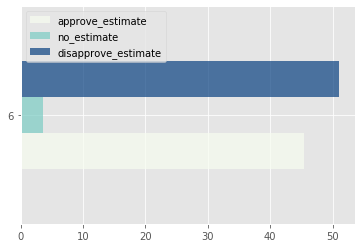

In [42]:
matplotlib.style.use('ggplot')

fig, ax = plt.subplots()
popular_file.loc[(popular_file['modeldate'].dt.date == dt_val.value) & (popular_file['subgroup']=='Voters')][['approve_estimate','no_estimate','disapprove_estimate']].plot.barh(colormap="GnBu", ax=ax, alpha=0.7)

plt.legend(loc="upper left")
plt.show()

## Bar Chart of Adults

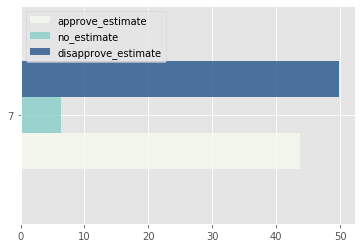

In [43]:
matplotlib.style.use('ggplot')

fig, ax = plt.subplots()
popular_file.loc[(popular_file['modeldate'].dt.date == dt_val.value) & (popular_file['subgroup']=='Adults')][['approve_estimate','no_estimate','disapprove_estimate']].plot.barh(colormap="GnBu", ax=ax, alpha=0.7)

plt.legend(loc="upper left")
plt.show()


In [46]:
# x_sc = bq.OrdinalScale()
# y_sc = bq.LinearScale()
# col_sc = bq.OrdinalColorScale(domain=[0, 1], colors=['Purple', 'Gray'])

# busy = [1, 0, 1]

# y_data = popular_file.loc[(popular_file['modeldate'].dt.date == dt_val.value) & (popular_file['subgroup']=='All polls')][['approve_estimate','no_estimate','disapprove_estimate']].values.tolist()[0]
# print(y_data)
# bar_chart = bq.Bars(x=[0,1,2], y=y_data, scales= {'x': x_sc, 'y': y_sc, 'color': col_sc},
#                  orientation='horizontal', type='grouped',
#                   interactions={'click': 'select'},
#                  labels=['approve','no','disapprove'],
#                  display_legend=True)

# ax_x = bq.Axis(scale=x_sc, orientation='vertical')
# ax_y = bq.Axis(scale=y_sc, orientation='horizontal',tick_format='0.2f')


# bar_chart.color = busy

# bq.Figure(marks=[bar_chart], axes=[ax_x, ax_y])

## PROSE

Prose (30 pts):

One paragraph explaining how to use the dashboard you created, to help someone who is not an expert understand your dataset. A list of 1 or more contextual datasets you have identified, links to where they reside, and a sentence about why they might be useful in telling the final story.

Prose behind creating the dashboard:
    My goal for this end project is to have visualize the effect of covid-19 on American polls, people and the leaders, how well are the elections running and who is being coined as most popular amongst the pool of viable candidates for the upcoming elections 2020 in the U.S. 
    Using matplotlib, pandas, bqplot and ipywidgets libraries in Python, I was able to develop multiple charts - a line, a bar (horizontal and vertical).These graphs were enabled with interactivity such as dropdown and date-picker. To understand a story, a live connection or interaction is necessary to view the changes on the fly. 
    Having 3 datasets at hand, for each scenario I plotted a line chart showing what percentage of Americans which includes some, not all, very and not very- to gauge their reception about President Trump's action toward covid-19. Another dataset relating to the previous information is how poular Mr Trump is as compared to his competitors standing for the polls. Here, I have displayed a bar chart indicating the approval and disapproval estimate  against a timeline from Jan 2020 to April 2020. This has been kept in mind and visualized for each specific cateogry of public- be it all polls,adults or voters. Selecting a particu;ar date for that subgroup depicts the estimate percentage accordingly. This leads us to analyzing how many votes did each candidate gather who are running for President electins. For this, I used the data columns at hand to vary the number of polls accrued by each standing candidate according to a pollster. 
    Manifestation of this critical information from a set of eclectic fields and predicting the numbers and values is what I acheived and aimed at by developing this live dashboard!!!

Contextual Dataset:
    With projects and data at fivethirtyeight being massive and rendering real-time feeds,I came up with a few more datasets related to the ongoing elections 2020. Having not explored these for my current dashboard story, I belive these would go hand in hand in telling the final story and elevating & amalgamating any missing or unread pieces for the same! 
    https://projects.fivethirtyeight.com/2020-primary-forecast/
    https://projects.fivethirtyeight.com/coronavirus-polls/

## INTERACTIVE DASHBOARD LINK

To visualise the charts plotted above with the help of bqplot and ipywidgets libraries in Python, I used Voila dashboard to link the same. Using pip install and providing the path of the created jupyter notebook,the dashboard is now live!!
Link is as follows: 
    http://localhost:8866/
            